In [1]:
%matplotlib widget

import mne
import matplotlib.pyplot as plt
import numpy as np

/blue/gkalamangalam/jmark.ettinger/.conda/envs/myMNE/lib/python3.11/site-packages/mne/externals/tempita/__init__.py:35: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi


In [2]:
path = '/blue/gkalamangalam/jmark.ettinger/eegCompress/processedData/origAndPredictedLossy.npz'
temp = np.load(path)
data = temp['arr_0']
predicted = temp['arr_1']
residual = data - predicted
print(np.mean(np.abs(residual)), np.max(np.abs(residual)))

0.043555457 1.1147528


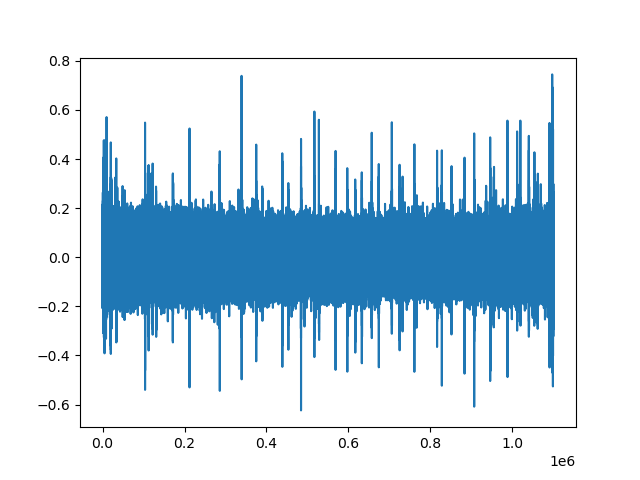

In [3]:
channel = 2

plt.figure()
#plt.plot(predicted[channel,:])
#plt.plot(data[channel,:])
plt.plot(residual[channel,:])
plt.show()

# Export to EDF

In [21]:
goodChannels = ['Fp1','F3','C3','P3','O1','Fp2','F4','C4','P4','O2','F7','T7','P7','F8','T8','P8','Fz','Cz','Pz']
info = mne.create_info(sfreq=256, ch_names=goodChannels)

path = '/blue/gkalamangalam/jmark.ettinger/eegCompress/processedData/original.edf'
raw = mne.io.RawArray(data, info)
mne.export.export_raw(path, raw, fmt='edf', overwrite=True)

path = '/blue/gkalamangalam/jmark.ettinger/eegCompress/processedData/compressed.edf'
raw = mne.io.RawArray(predicted, info)
mne.export.export_raw(path, raw, fmt='edf', overwrite=True)

Creating RawArray with float64 data, n_channels=19, n_times=1100544
    Range : 0 ... 1100543 =      0.000 ...  4298.996 secs
Ready.
Overwriting existing file.
Creating RawArray with float64 data, n_channels=19, n_times=1100544
    Range : 0 ... 1100543 =      0.000 ...  4298.996 secs
Ready.
Overwriting existing file.
